In [1]:
import os 
import torch 
import kcc 
from kcc.datasets import PSBMDataset, TimeseriesLMDataset
import matplotlib.pyplot as plt 

data_path = '../data'
tsic_dataset = TimeseriesLMDataset(data_path, return_tensor=True)

model_type = 'tsic'
n_layer = 1         # [0 1 2 3]
n_head = 12          # [0, 12]
attention_type= 'only'   #  [only, also]

model = kcc.load_model(data_path, model_type, attention_type, n_layer, n_head,)

GPT2Config {
  "activation_function": "gelu_new",
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 1,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "transformers_version": "4.29.2",
  "use_cache": true,
  "vocab_size": 25
}



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


torch.Size([1, 50])
torch.Size([1, 50, 25])
tensor([[ 2, 21,  0,  1, 19,  9, 19, 21,  8,  3, 15, 16,  3, 21,  8, 11, 13,  8,
          3, 21,  5, 18, 21,  8,  3, 17, 17, 22, 21,  8,  3,  9, 16,  3,  7,  8,
         20,  4,  8, 14, 21,  5, 18, 21,  8,  3, 17,  9, 22, 21,  8,  3, 17,  4,
          0, 18,  7,  5,  0, 18, 21,  8,  3, 17, 22, 21,  8,  3, 17, 22, 21,  8,
          3, 17, 22]])


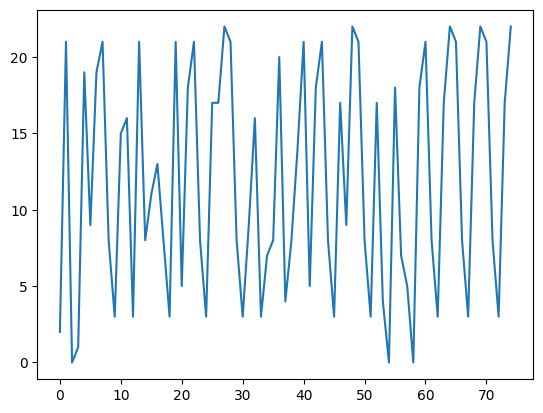

In [3]:

x = tsic_dataset[0]
x['input_ids'] = x['input_ids'].unsqueeze(0)
print(x['input_ids'].size())

outputs = model(**x)
print(outputs.logits.size())

greedy_output = model.generate(**x, max_length=75)
print(greedy_output)

plt.plot(greedy_output[0])
